## TAXI FARE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import utils

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [5]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<AxesSubplot:xlabel='unique_id', ylabel='count'>

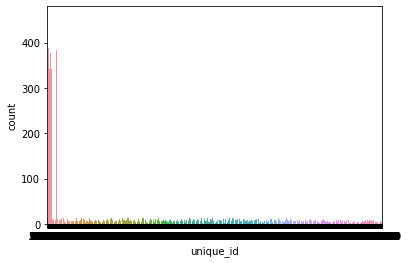

In [7]:
sns.countplot(x="unique_id",data=df)

In [8]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
34030,49:05.0,4.5,2010-01-08 00:49:05 UTC,-73.976123,40.750666,-73.984523,40.754647,1
26144,30:00.0,31.7,2012-02-06 11:30:00 UTC,-73.862855,40.769122,-73.979668,40.758807,1
19282,33:00.0,11.0,2013-12-18 00:33:00 UTC,-73.997730,40.718590,-74.006080,40.748440,1
5446,25:00.0,11.0,2013-04-11 20:25:00 UTC,-74.009678,40.704795,-73.989192,40.730692,1
8658,27:11.0,7.5,2014-04-09 17:27:11 UTC,-73.957367,40.768677,-73.958087,40.781877,1
21493,41:00.0,6.5,2014-01-28 08:41:00 UTC,-73.949932,40.772252,-73.948400,40.771517,1
39335,52:20.0,18.0,2013-06-17 19:52:20 UTC,-73.995455,40.749624,-73.950142,40.783880,1
12384,51:00.0,31.3,2011-02-09 12:51:00 UTC,-74.006808,40.729102,-73.957365,40.609123,5
30104,13:00.0,8.9,2012-04-05 13:13:00 UTC,-73.975187,40.755738,-73.972637,40.780880,1
20583,10:56.0,12.9,2011-02-04 08:10:56 UTC,-73.993921,40.761201,-73.994698,40.728090,1


<AxesSubplot:xlabel='unique_id', ylabel='amount'>

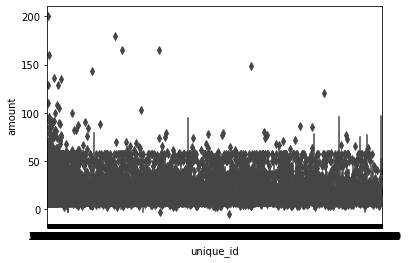

In [9]:
sns.boxplot(x="unique_id",y="amount",data=df)

array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'longitude_of_pickup'}>],
       [<AxesSubplot:title={'center':'latitude_of_pickup'}>,
        <AxesSubplot:title={'center':'longitude_of_dropoff'}>],
       [<AxesSubplot:title={'center':'latitude_of_dropoff'}>,
        <AxesSubplot:title={'center':'no_of_passenger'}>]], dtype=object)

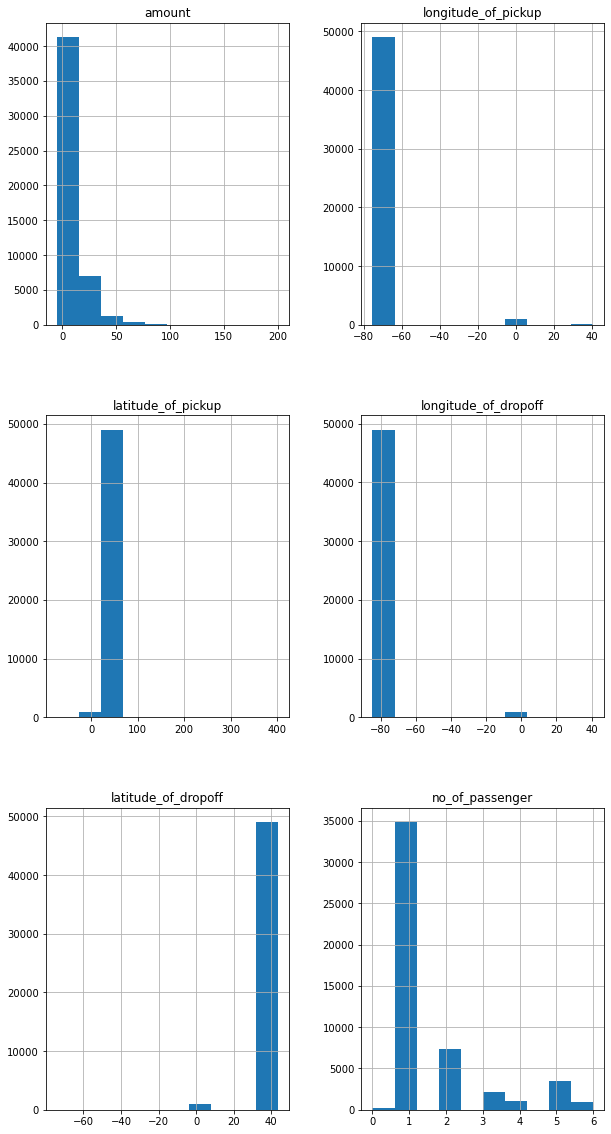

In [10]:
df.hist(figsize=(10,20))

In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [12]:
df=df.replace('[^\d.]','',regex=True).astype(float)

In [13]:
df.dtypes

unique_id               float64
amount                  float64
date_time_of_pickup     float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger         float64
dtype: object

In [14]:
X=df.drop('amount',axis=1)
X

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,2621.0,2.009062e+13,-73.844311,40.721319,-73.841610,40.712278,1.0
1,5216.0,2.010011e+13,-74.016048,40.711303,-73.979268,40.782004,1.0
2,3500.0,2.011082e+13,-73.982738,40.761270,-73.991242,40.750562,2.0
3,3042.0,2.012042e+13,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5100.0,2.010031e+13,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
49995,2515.0,2.013061e+13,-73.999973,40.748531,-74.016899,40.705993,1.0
49996,1918.0,2.015062e+13,-73.984756,40.768211,-73.987366,40.760597,1.0
49997,5300.0,2.011013e+13,-74.002698,40.739428,-73.998108,40.759483,1.0
49998,900.0,2.012111e+13,-73.946062,40.777567,-73.953450,40.779687,2.0


In [15]:
Y=df.amount
Y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
model.score(X_train,Y_train)
model.score(X_test,Y_test)

0.0167832944596924

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
model4=AdaBoostClassifier()
model4.fit
model.fit(X_train,Y_train)
model.score(X_train,Y_train)


0.014852568144310796

# With Single Independent Variable

###  Simple linear regression-->

In [22]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,2621.0,4.5,2.009062e+13,-73.844311,40.721319,-73.841610,40.712278,1.0
1,5216.0,16.9,2.010011e+13,-74.016048,40.711303,-73.979268,40.782004,1.0
2,3500.0,5.7,2.011082e+13,-73.982738,40.761270,-73.991242,40.750562,2.0
3,3042.0,7.7,2.012042e+13,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5100.0,5.3,2.010031e+13,-73.968095,40.768008,-73.956655,40.783762,1.0
5,5045.0,12.1,2.011011e+13,-74.000964,40.731630,-73.972892,40.758233,1.0
6,3500.0,7.5,2.012112e+13,-73.980002,40.751662,-73.973802,40.764842,1.0
7,2200.0,16.5,2.012010e+13,-73.951300,40.774138,-73.990095,40.751048,1.0
8,1000.0,9.0,2.012120e+13,-74.006462,40.726713,-73.993078,40.731628,1.0
9,1100.0,8.9,2.009090e+13,-73.980658,40.733873,-73.991540,40.758138,2.0


array([[<AxesSubplot:title={'center':'unique_id'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'date_time_of_pickup'}>,
        <AxesSubplot:title={'center':'latitude_of_pickup'}>]],
      dtype=object)

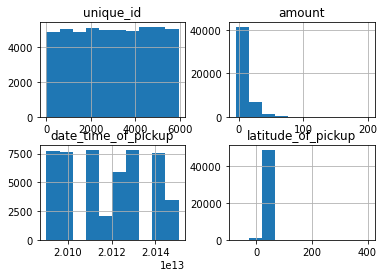

In [23]:
plt= df[['unique_id','amount','date_time_of_pickup','latitude_of_pickup']]
plt.hist()


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

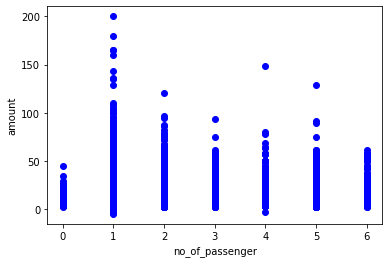

In [25]:
plt.scatter( df.no_of_passenger, df.amount,  color='blue')
plt.xlabel("no_of_passenger")
plt.ylabel("amount")
plt.show()

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

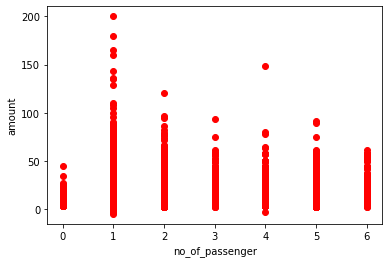

In [27]:
plt.scatter(train.no_of_passenger, train.amount, color='red')
plt.xlabel("no_of_passenger")
plt.ylabel("amount")
plt.show()

In [28]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
train_x= np.array(train[['no_of_passenger']])
train_y=np.array(train[['amount']])
regr.fit(train_x,train_y)

LinearRegression()

In [29]:
regr.coef_

array([[0.12262594]])

In [30]:
regr.intercept_

array([11.16100054])

Text(0, 0.5, 'amount')

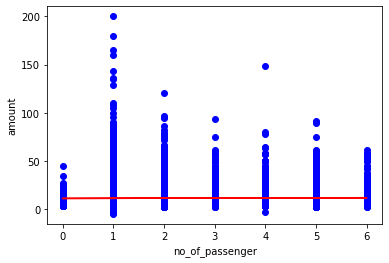

In [31]:
plt.scatter(train.no_of_passenger, train.amount,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("no_of_passenger")
plt.ylabel("amount")

In [32]:
regr.score(train_x,train_y)


0.0002632889615636902

In [33]:
test_x = np.array(test[['no_of_passenger']])
test_y = np.array(test[['amount']])
test_y_ = regr.predict(test_x)

In [34]:
regr.score(test_x,test_y)


0.00032192034134426173

In [35]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

Mean absolute error: 6.00


## Thank you !
